In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(907, 27)

<font size='4'>**Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Statistical Analysis

<font size='4'>**Data Integrity Check**

In [6]:
df.isin([' ','NA','-','?']).sum().any()

False

* No whitespace, NA, '-' exist in dataset.

In [7]:
df.duplicated().sum()

0

- **No Duplicate Entry Present in data.**

In [8]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

<font size='4'>**MISSING VALUE-CHECK**

In [9]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

<FONT SIZE='4'>**Missing value Impuatation**

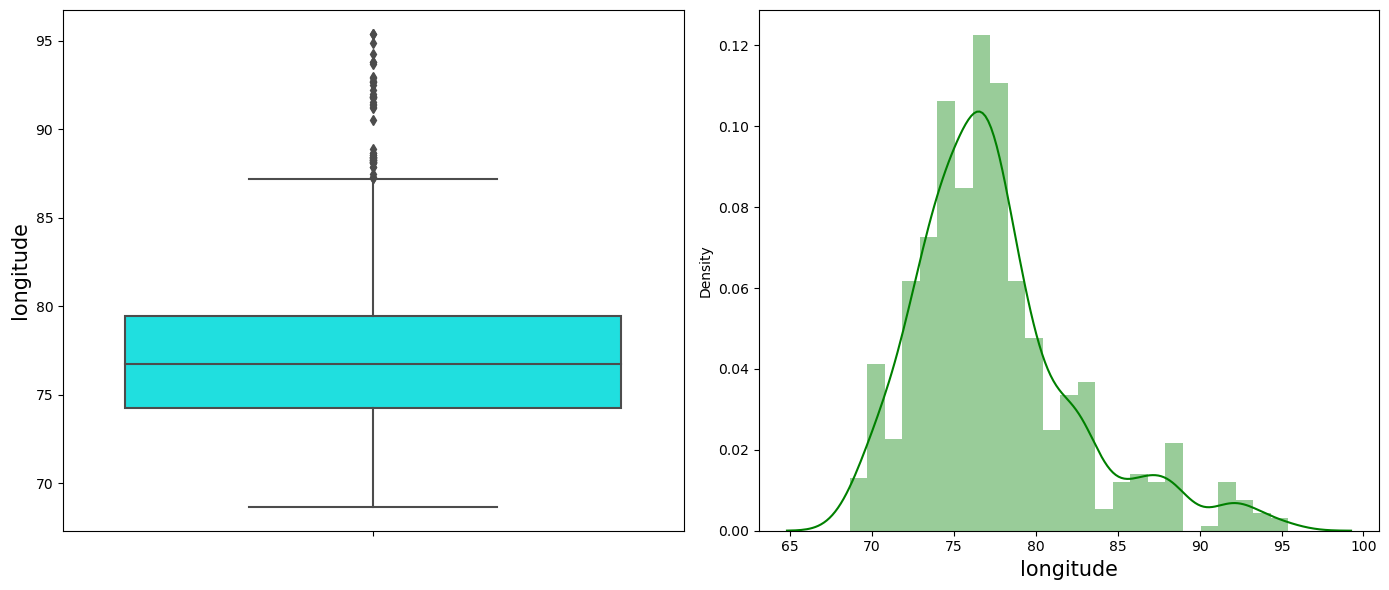

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='g')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

- **Based on presense of outliers we will impute longitude we with median.**

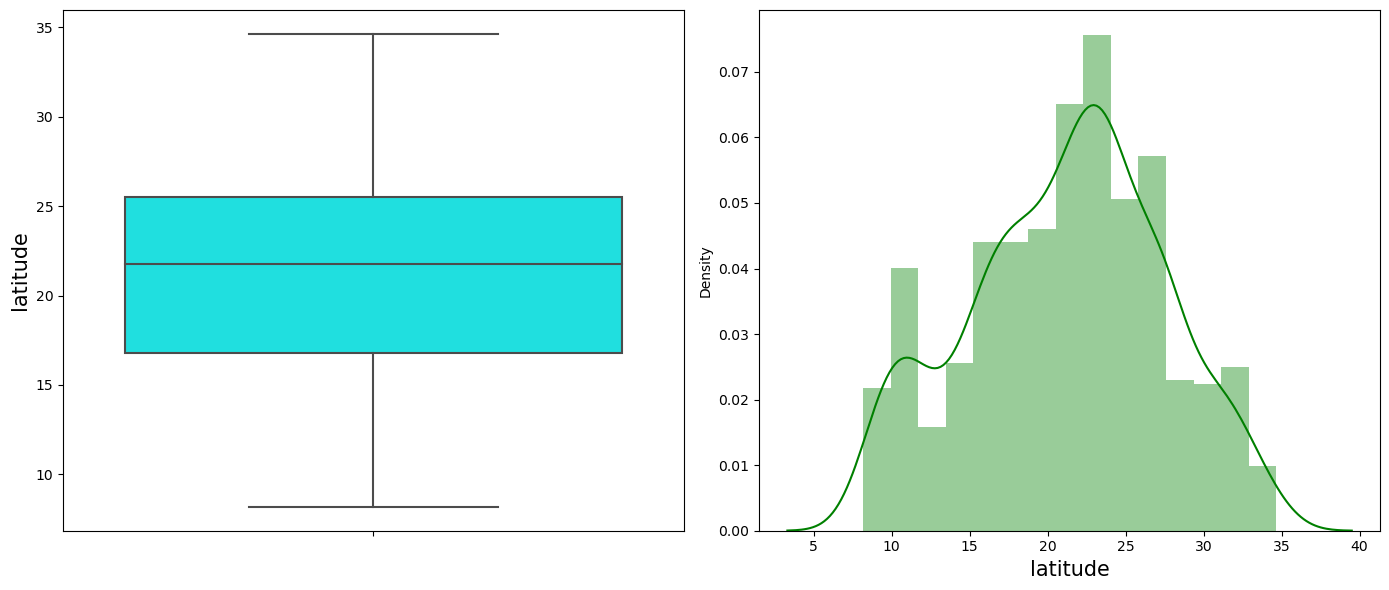

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='g')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

- **Based on absense of outliers we will impute latitude we with mean.**

In [12]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

df['longitude'] = df['longitude'].fillna(df['longitude'].median())

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [13]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


<font size='4'>**Statstical Matrix**

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<font size='4'>**Observations :-**

* Bigest Powerplant has power generation capacity of 4760 MW.

* In each Generation-GWHours columns Mean is greater than Median.

* Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

* Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe     most of powerplants are commission.

* Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.


**We have two different Target feature for regression and classification model.**

<font size='5'>**Regression Target feature - Capacity**

<font size='3'>**Before visualing feature let find details about Smallest & Biggest Powerplant**

In [15]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [16]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [17]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


<font size='4'>**Observations :-**

- **Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.** As Name suggest it     is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.

* Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. **This must be data entry   error as If powerplant is commission it cannot have capacity of 0 MW.**

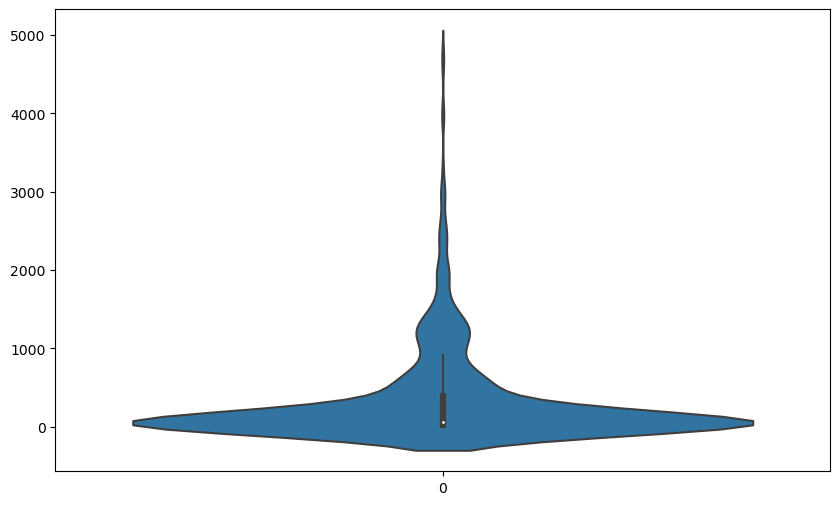

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

- **We can see there are very powerplant of capacity more than 1500 MW.**

In [19]:
df.loc[df.capacity_mw >1500].shape

(39, 15)

- **There only 15 powerplant of capacity more than 1500 MW.**

In [20]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

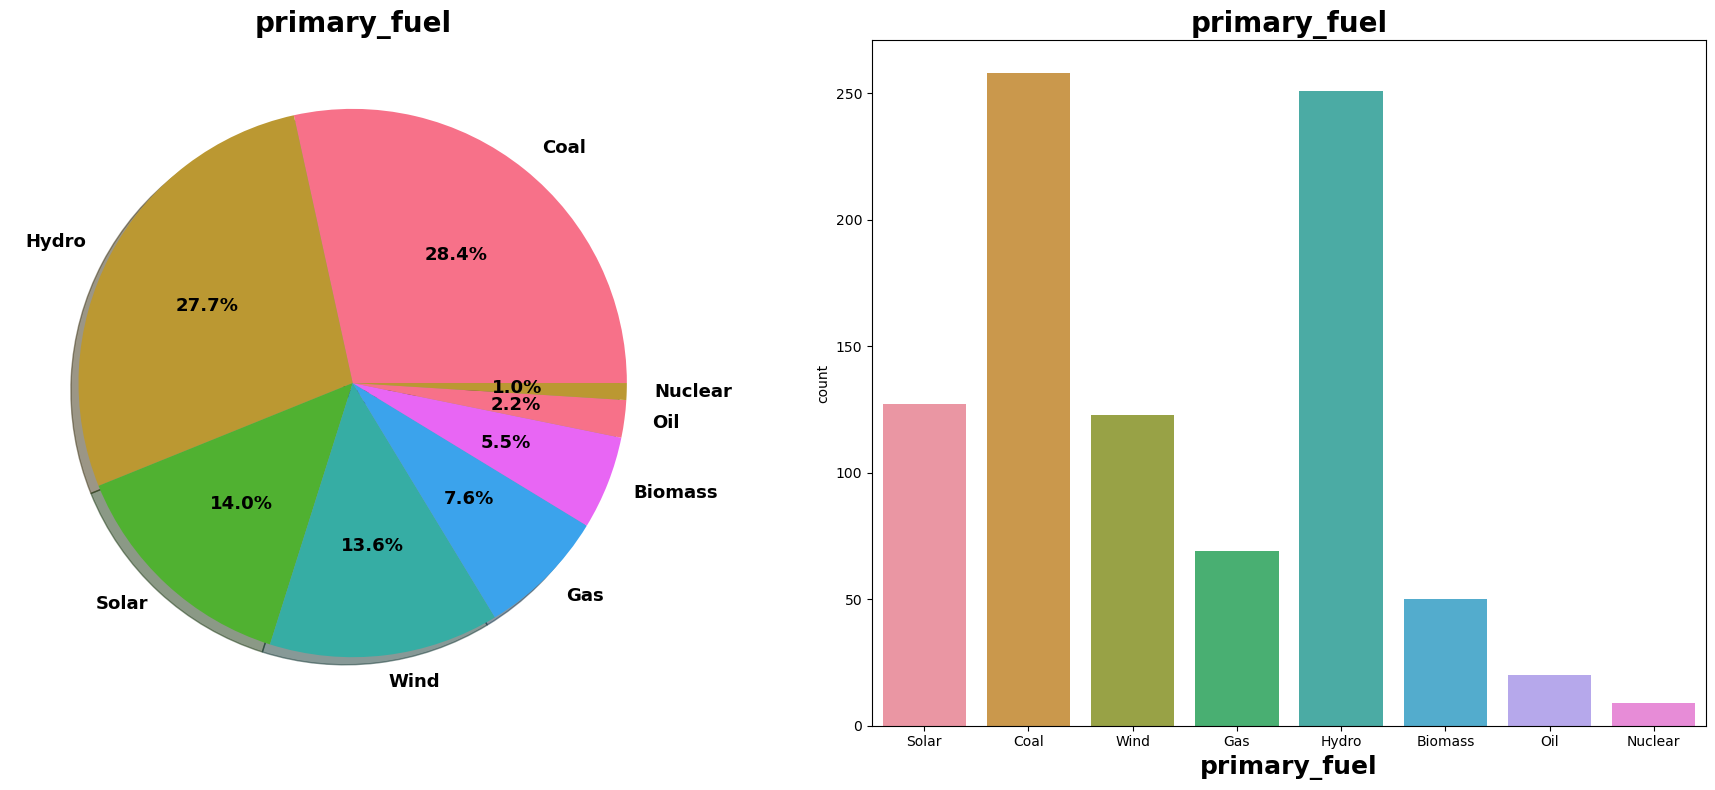

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [22]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<font size='4'>**Observations :-**

* Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

- **Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.**

* There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. **It will be interesting to look for       capacity of these powerplant.**


<font size='3'>**Let's find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.**

In [23]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [24]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


<font size='4'>**Observation :-**

- **Out of Total PowerGeneration Maximum comes from Coal.**


Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

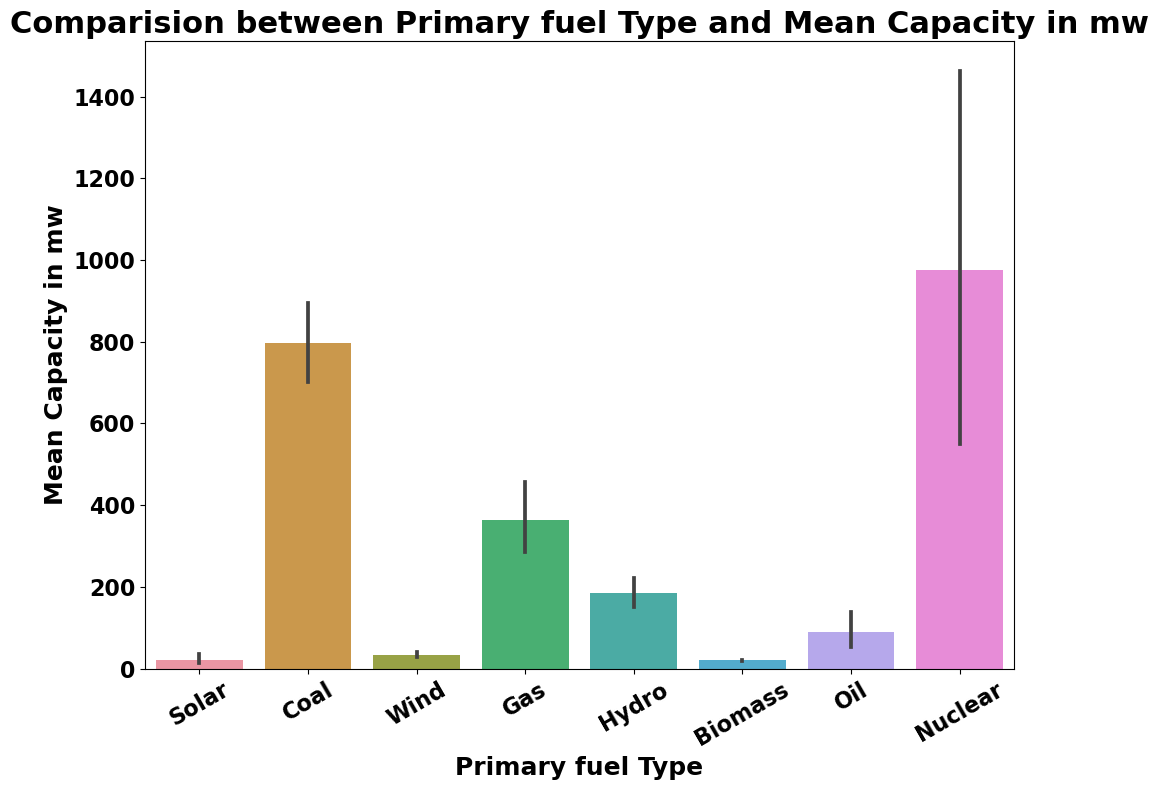

In [25]:
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

- **Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.**

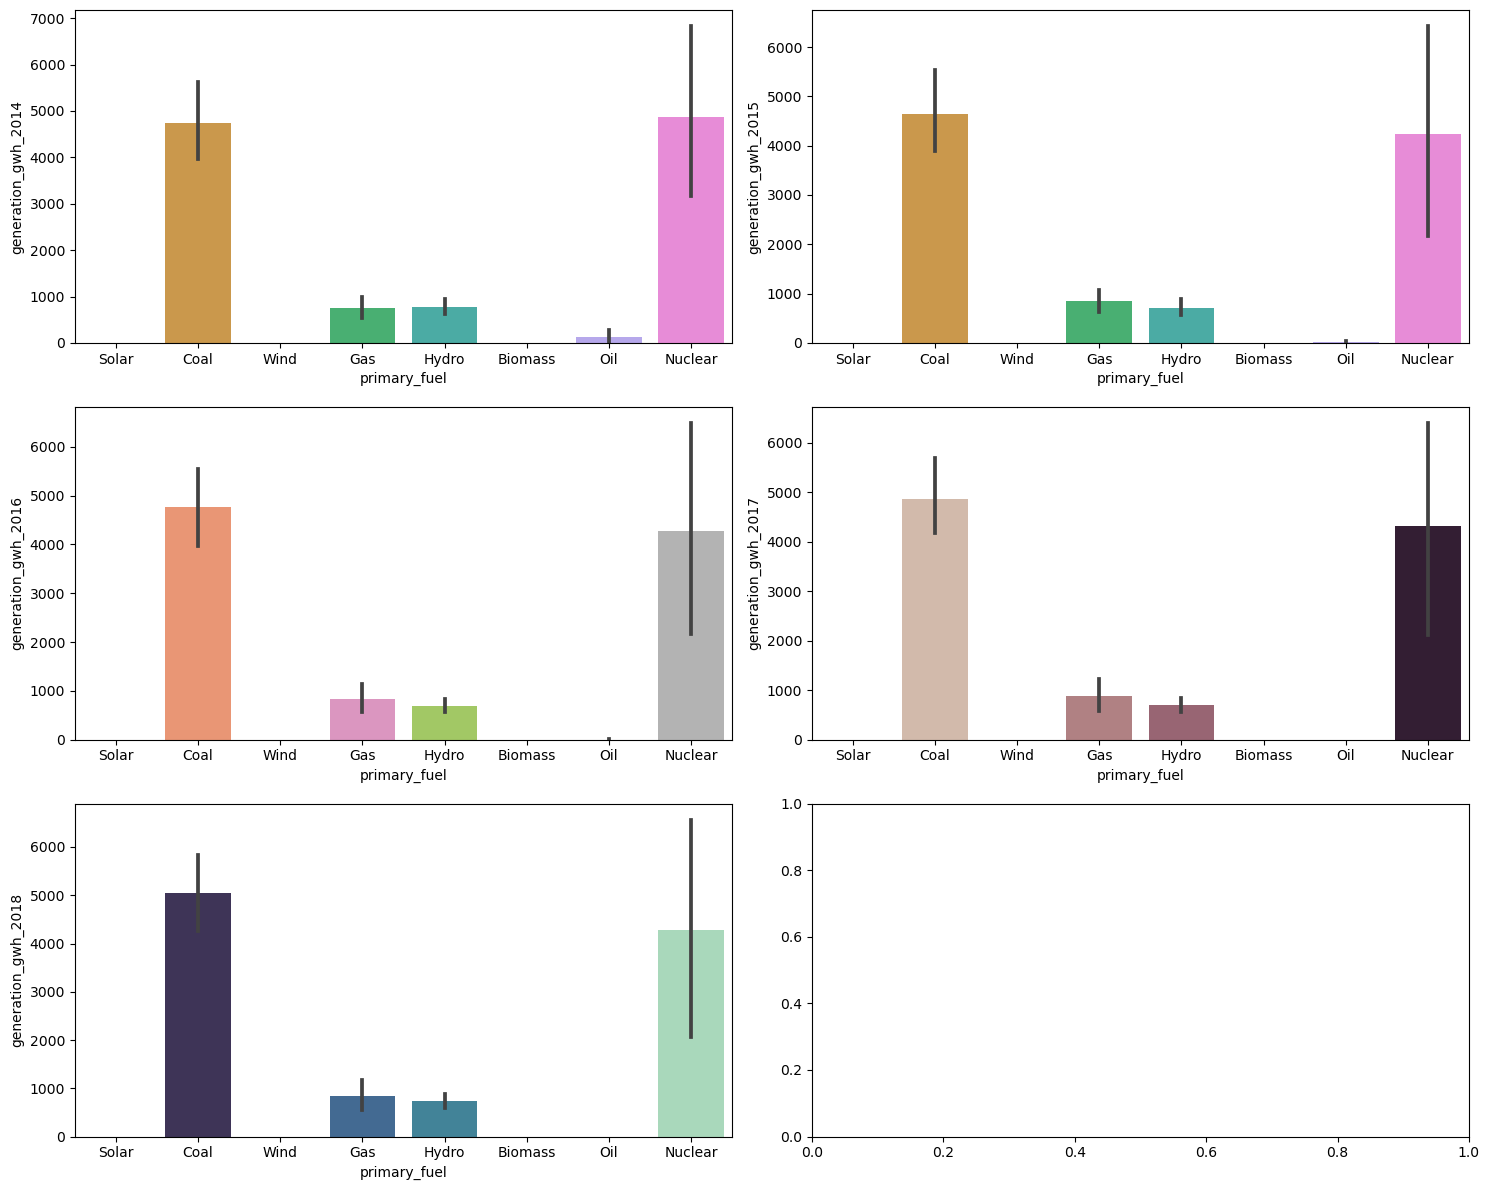

In [26]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")

sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[2,0],data=df,palette="mako")

plt.show()

<font size='4'>**Observations :-**
    
* From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason   is high efficieny of Nuclear powerplants.

* Other fuel types have very less contribution to power generation.

<font size='4'>**Location vs Primary Fuel**

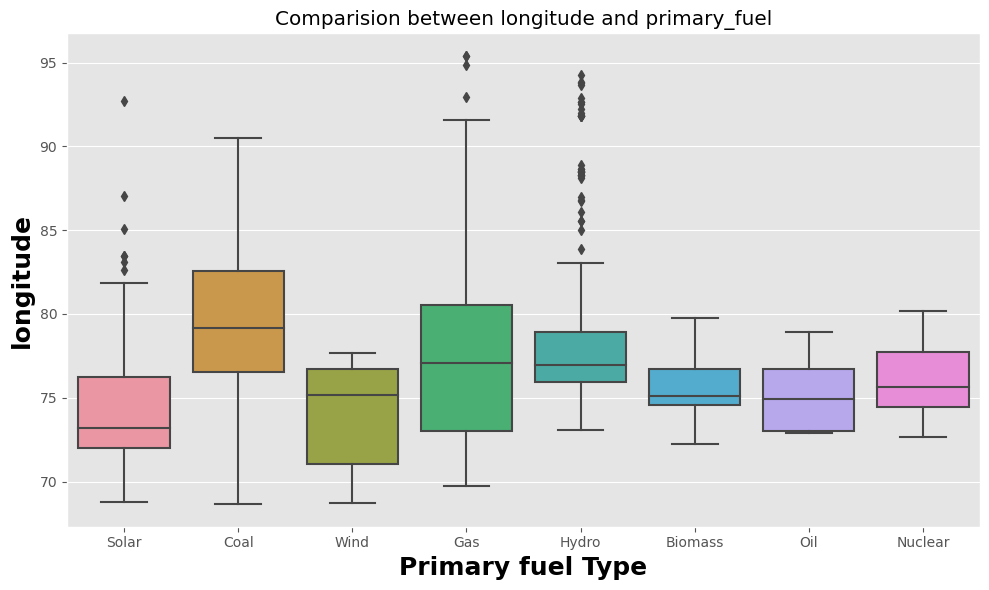

In [27]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x=df['primary_fuel'],y=df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

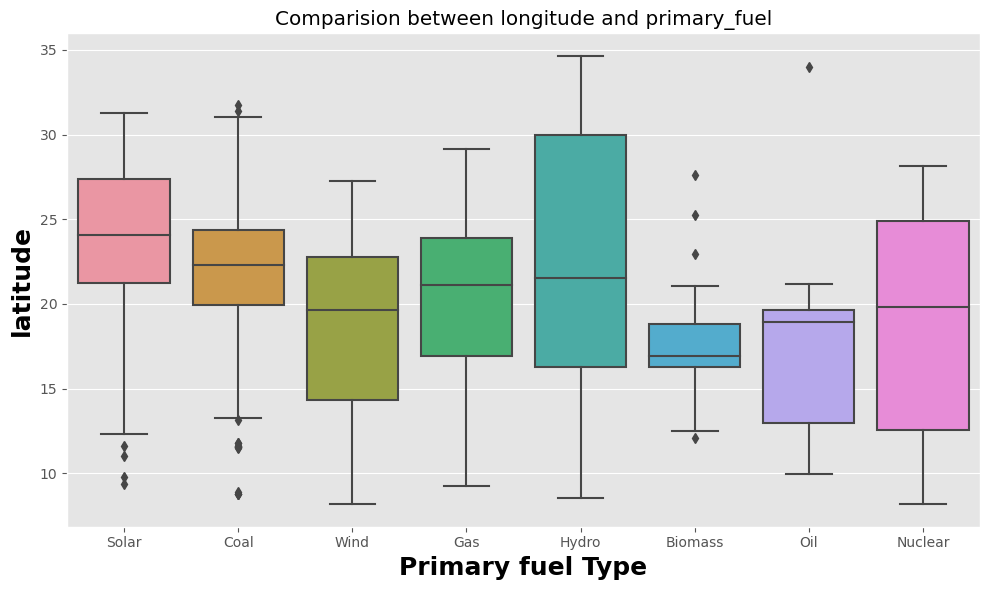

In [28]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x=df['primary_fuel'],y=df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

<font size='4'>**Observations :-**
    
* Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and             longitudnal range of 75 to 88 degree.

* We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear   and intense sunlight with minimum humidity.

<font size='4'>**Location vs Capacity**

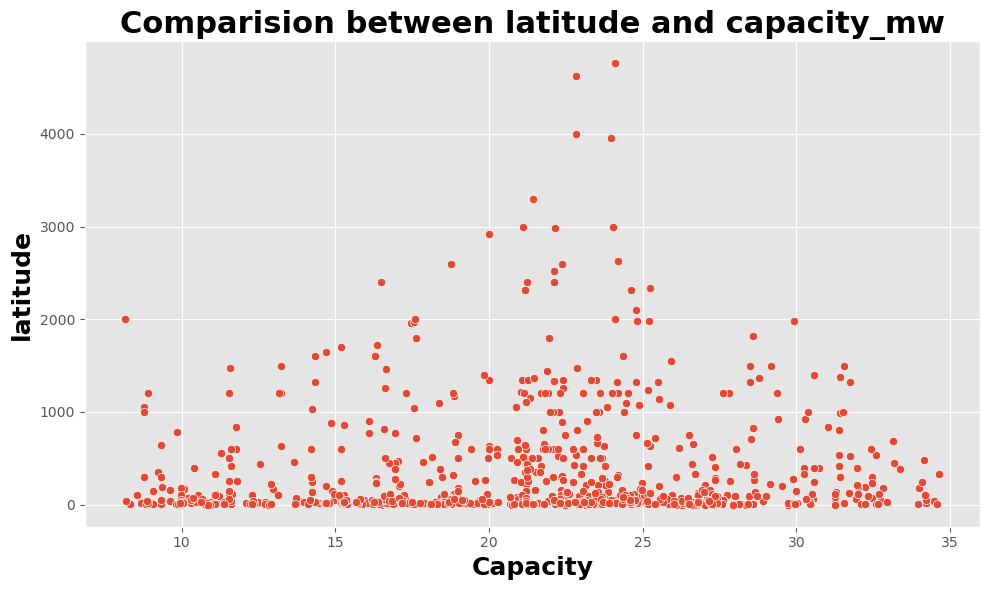

In [29]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(x=df['latitude'],y=df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

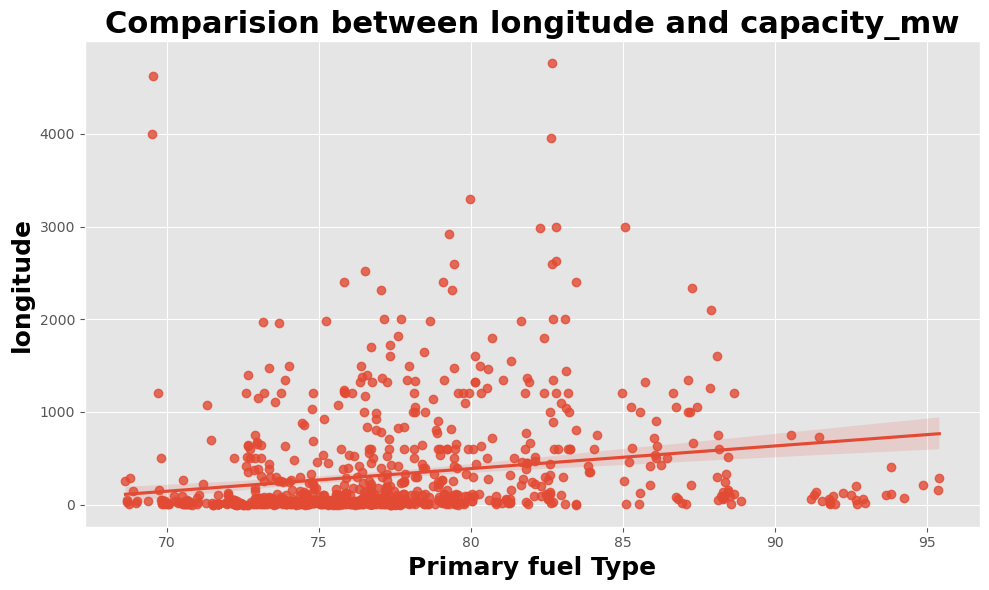

In [30]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(x=df['longitude'],y=df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

- **Nothing significant insight gain from above plots.**


<font size='4'>**Commission age vs primary fuel**

In [31]:
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [32]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [33]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


- **Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.**

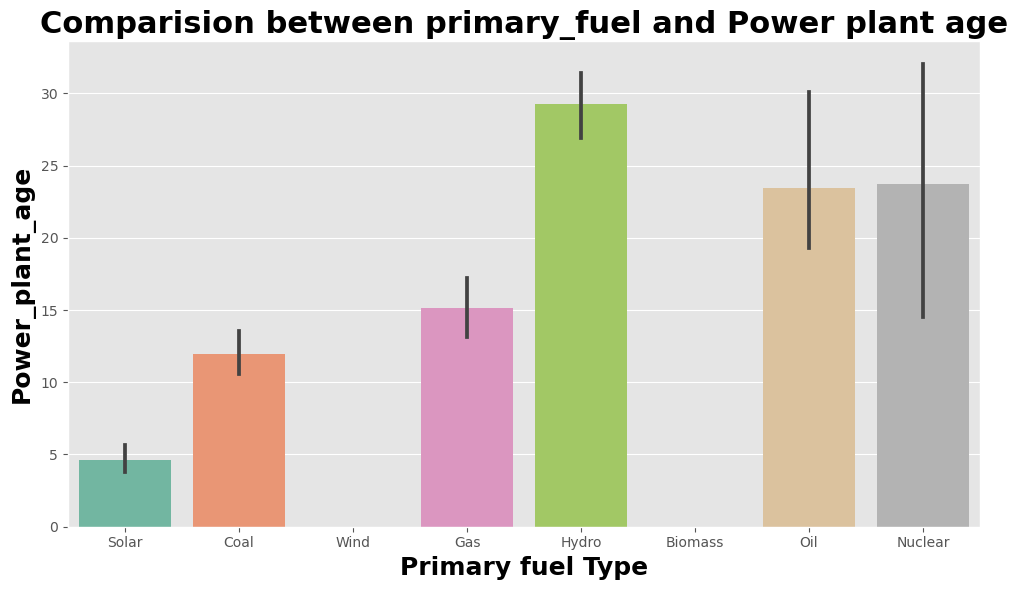

In [34]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

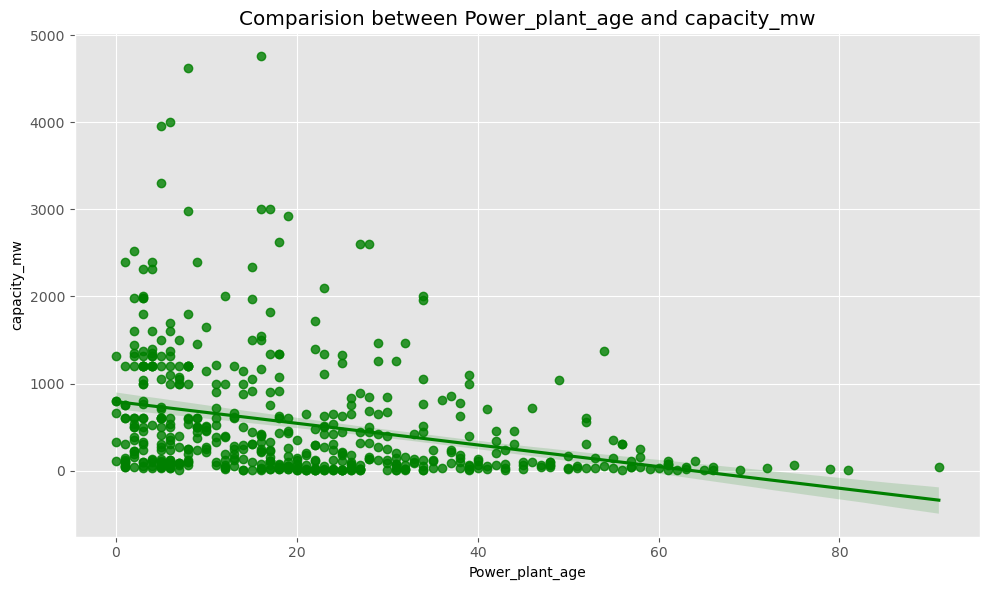

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x=df['Power_plant_age'],y=df['capacity_mw'],color = "g")

- There is negative linear relationship between feature and label.

- We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

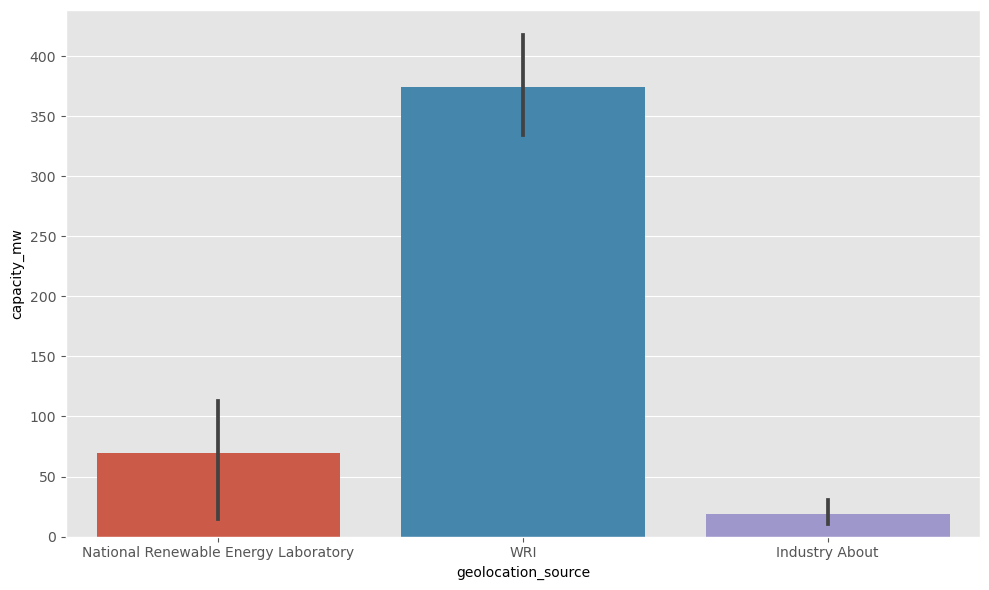

In [36]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

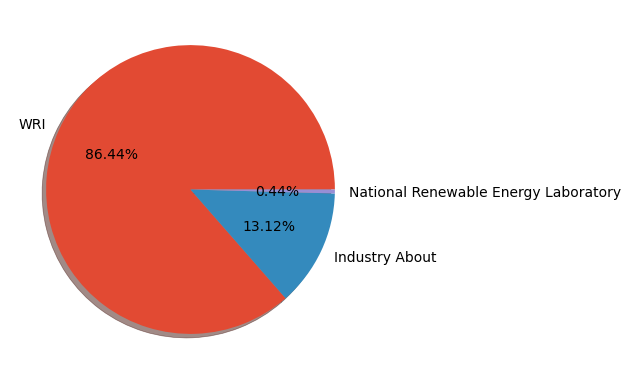

In [37]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.



<font size='3'>**Distribution of features**

In [38]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']

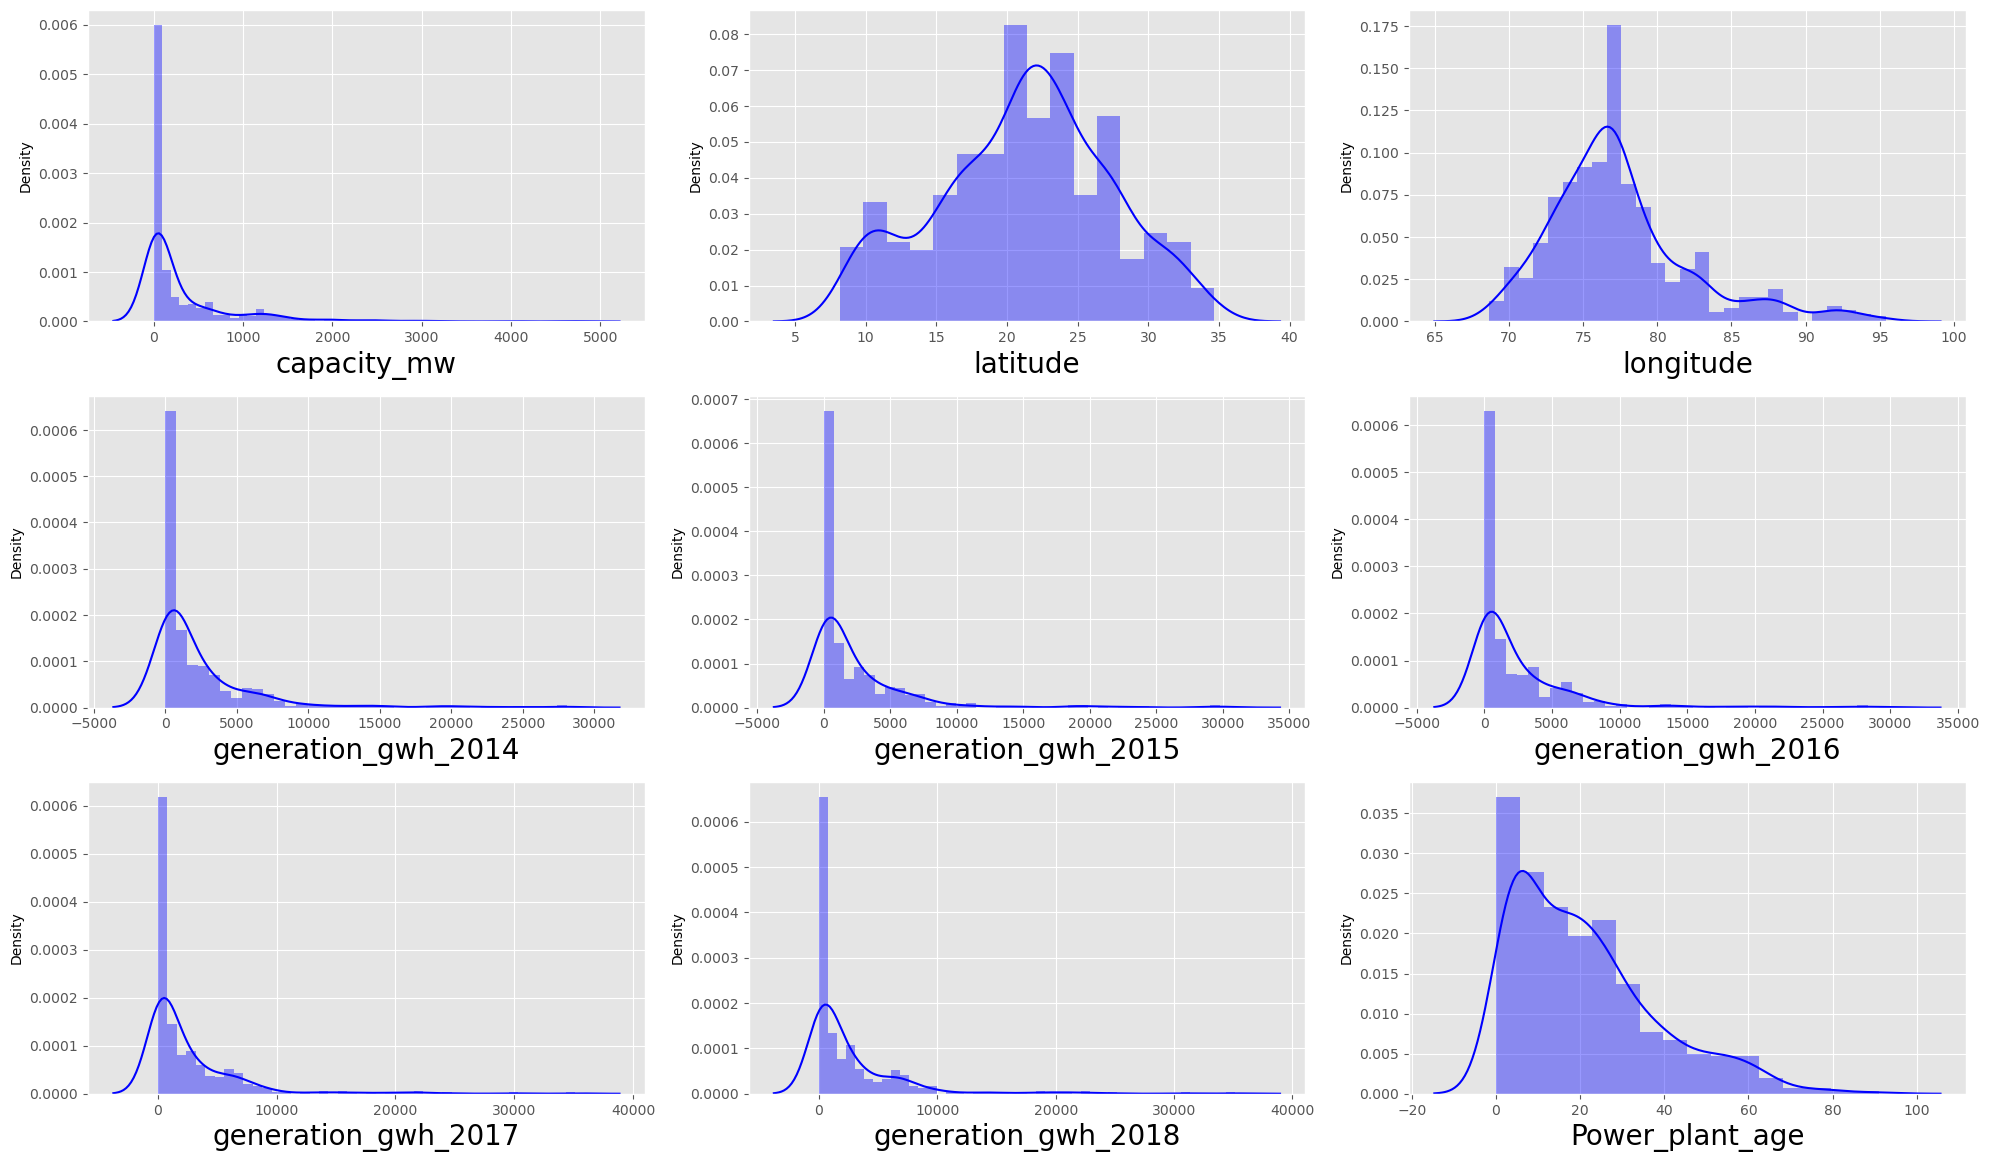

In [39]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<font size='4'>**Observations :-**

- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude     and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

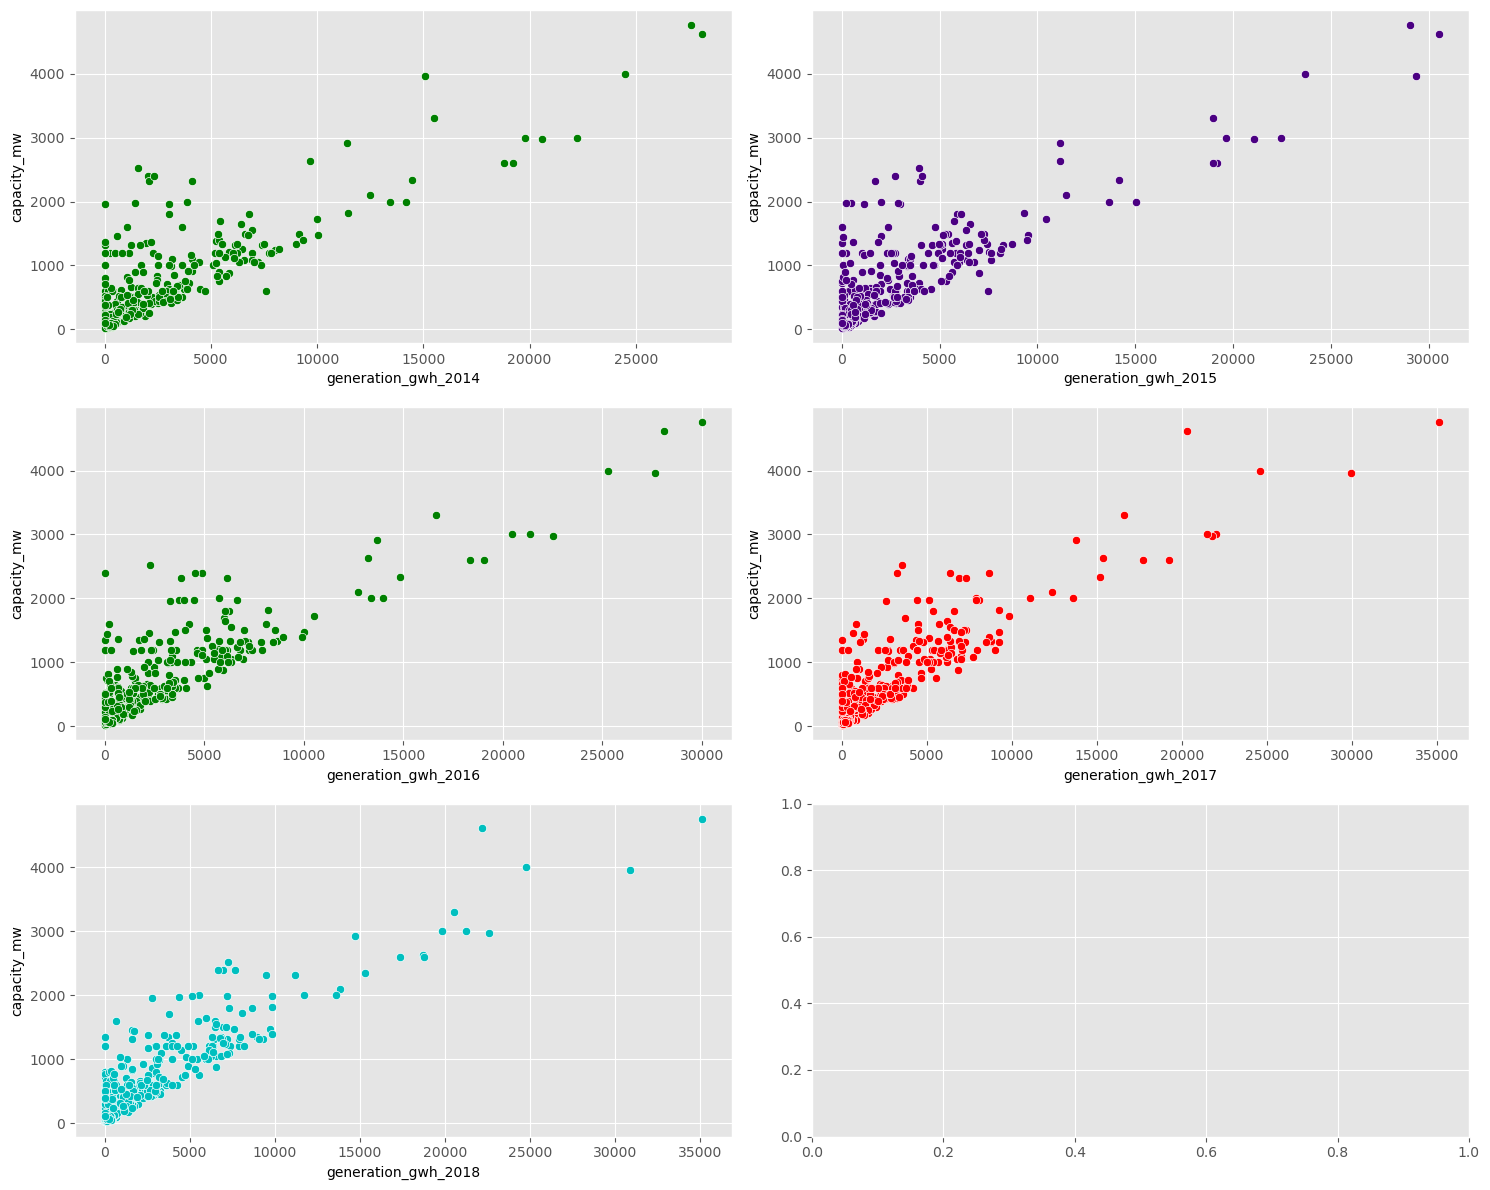

In [40]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")

sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="c")

plt.show()

<font size='4'>**Observations :-**
 
- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

- The plot shows the electricity generation reported for the years 2014,2015,2016,2017,2018 have high capacity of above 1000mw. Also   the power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant also increases.

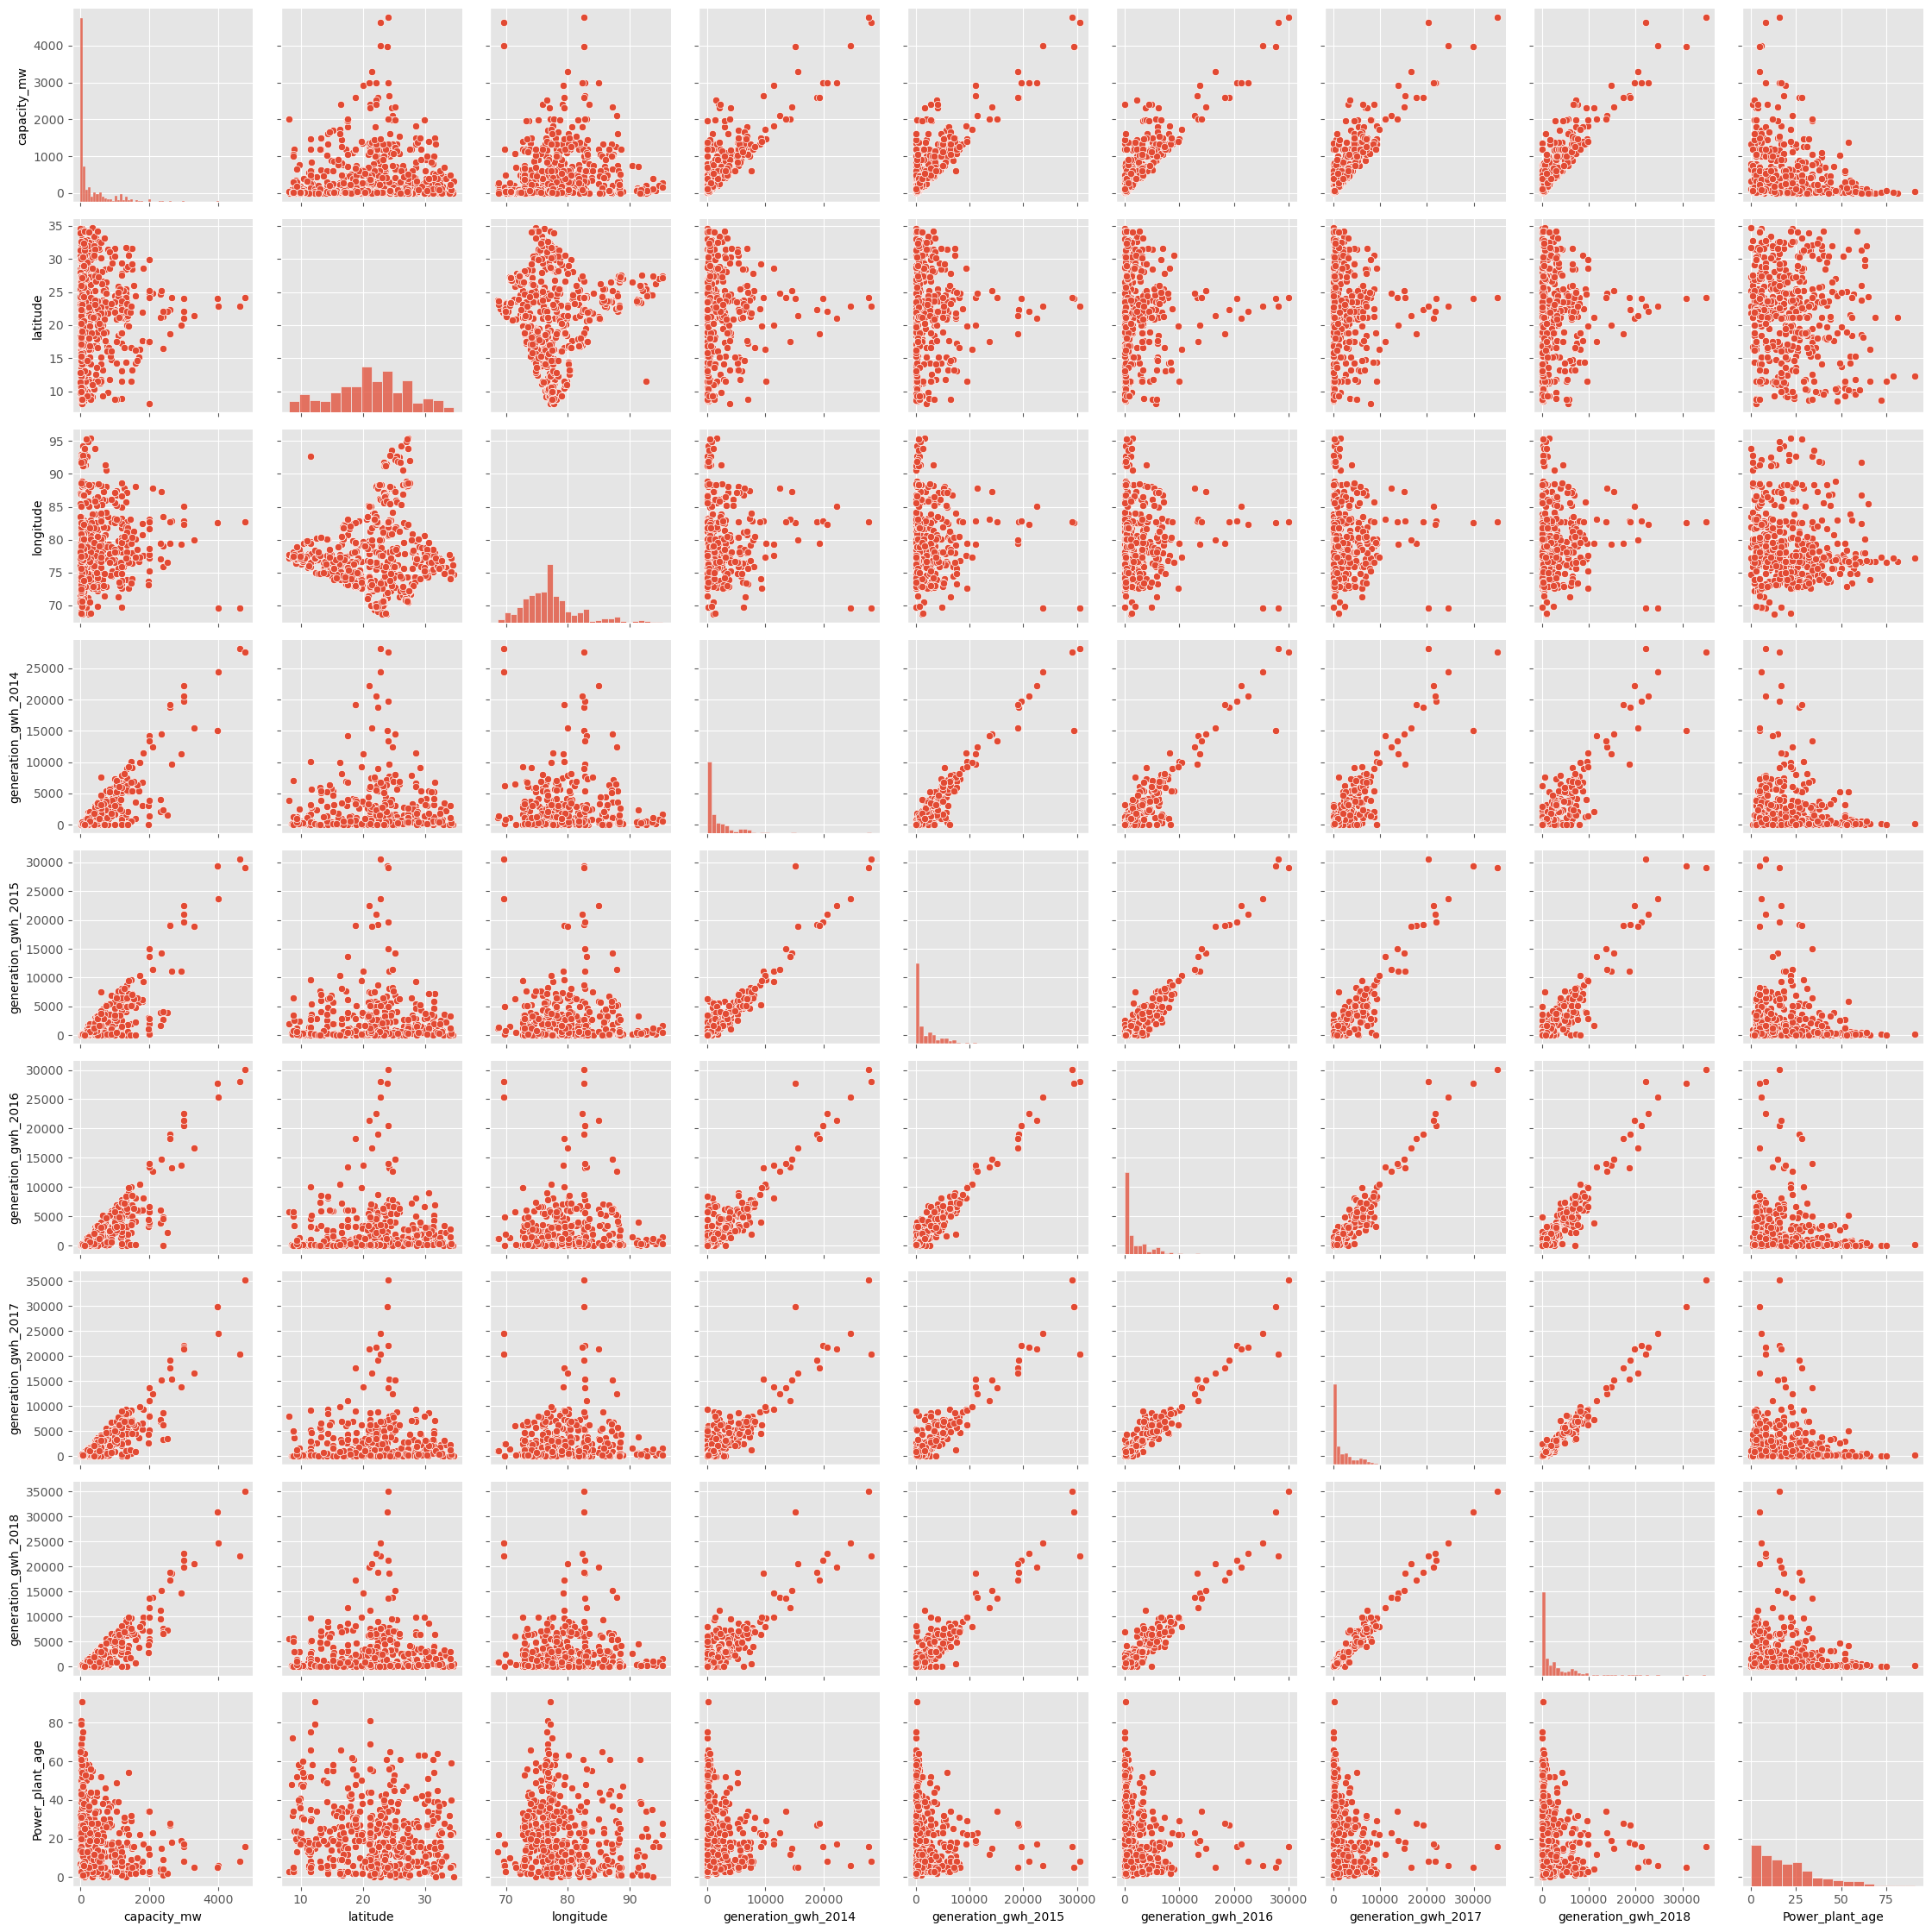

In [41]:
sns.pairplot(df)

<font size='4'>**Observations :-**
    
- Most of the features have strong linear relationship and correlation with each other.

- From the plot we can observe the outliers in some of the columns.

- We can see histogram on the diagonal.

<font size='5'>**Encoding Categorical Data**

In [42]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [43]:
df.drop(columns=['name'],axis=1,inplace=True)

In [44]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


<font size='4'>**Outliers detection and removal**

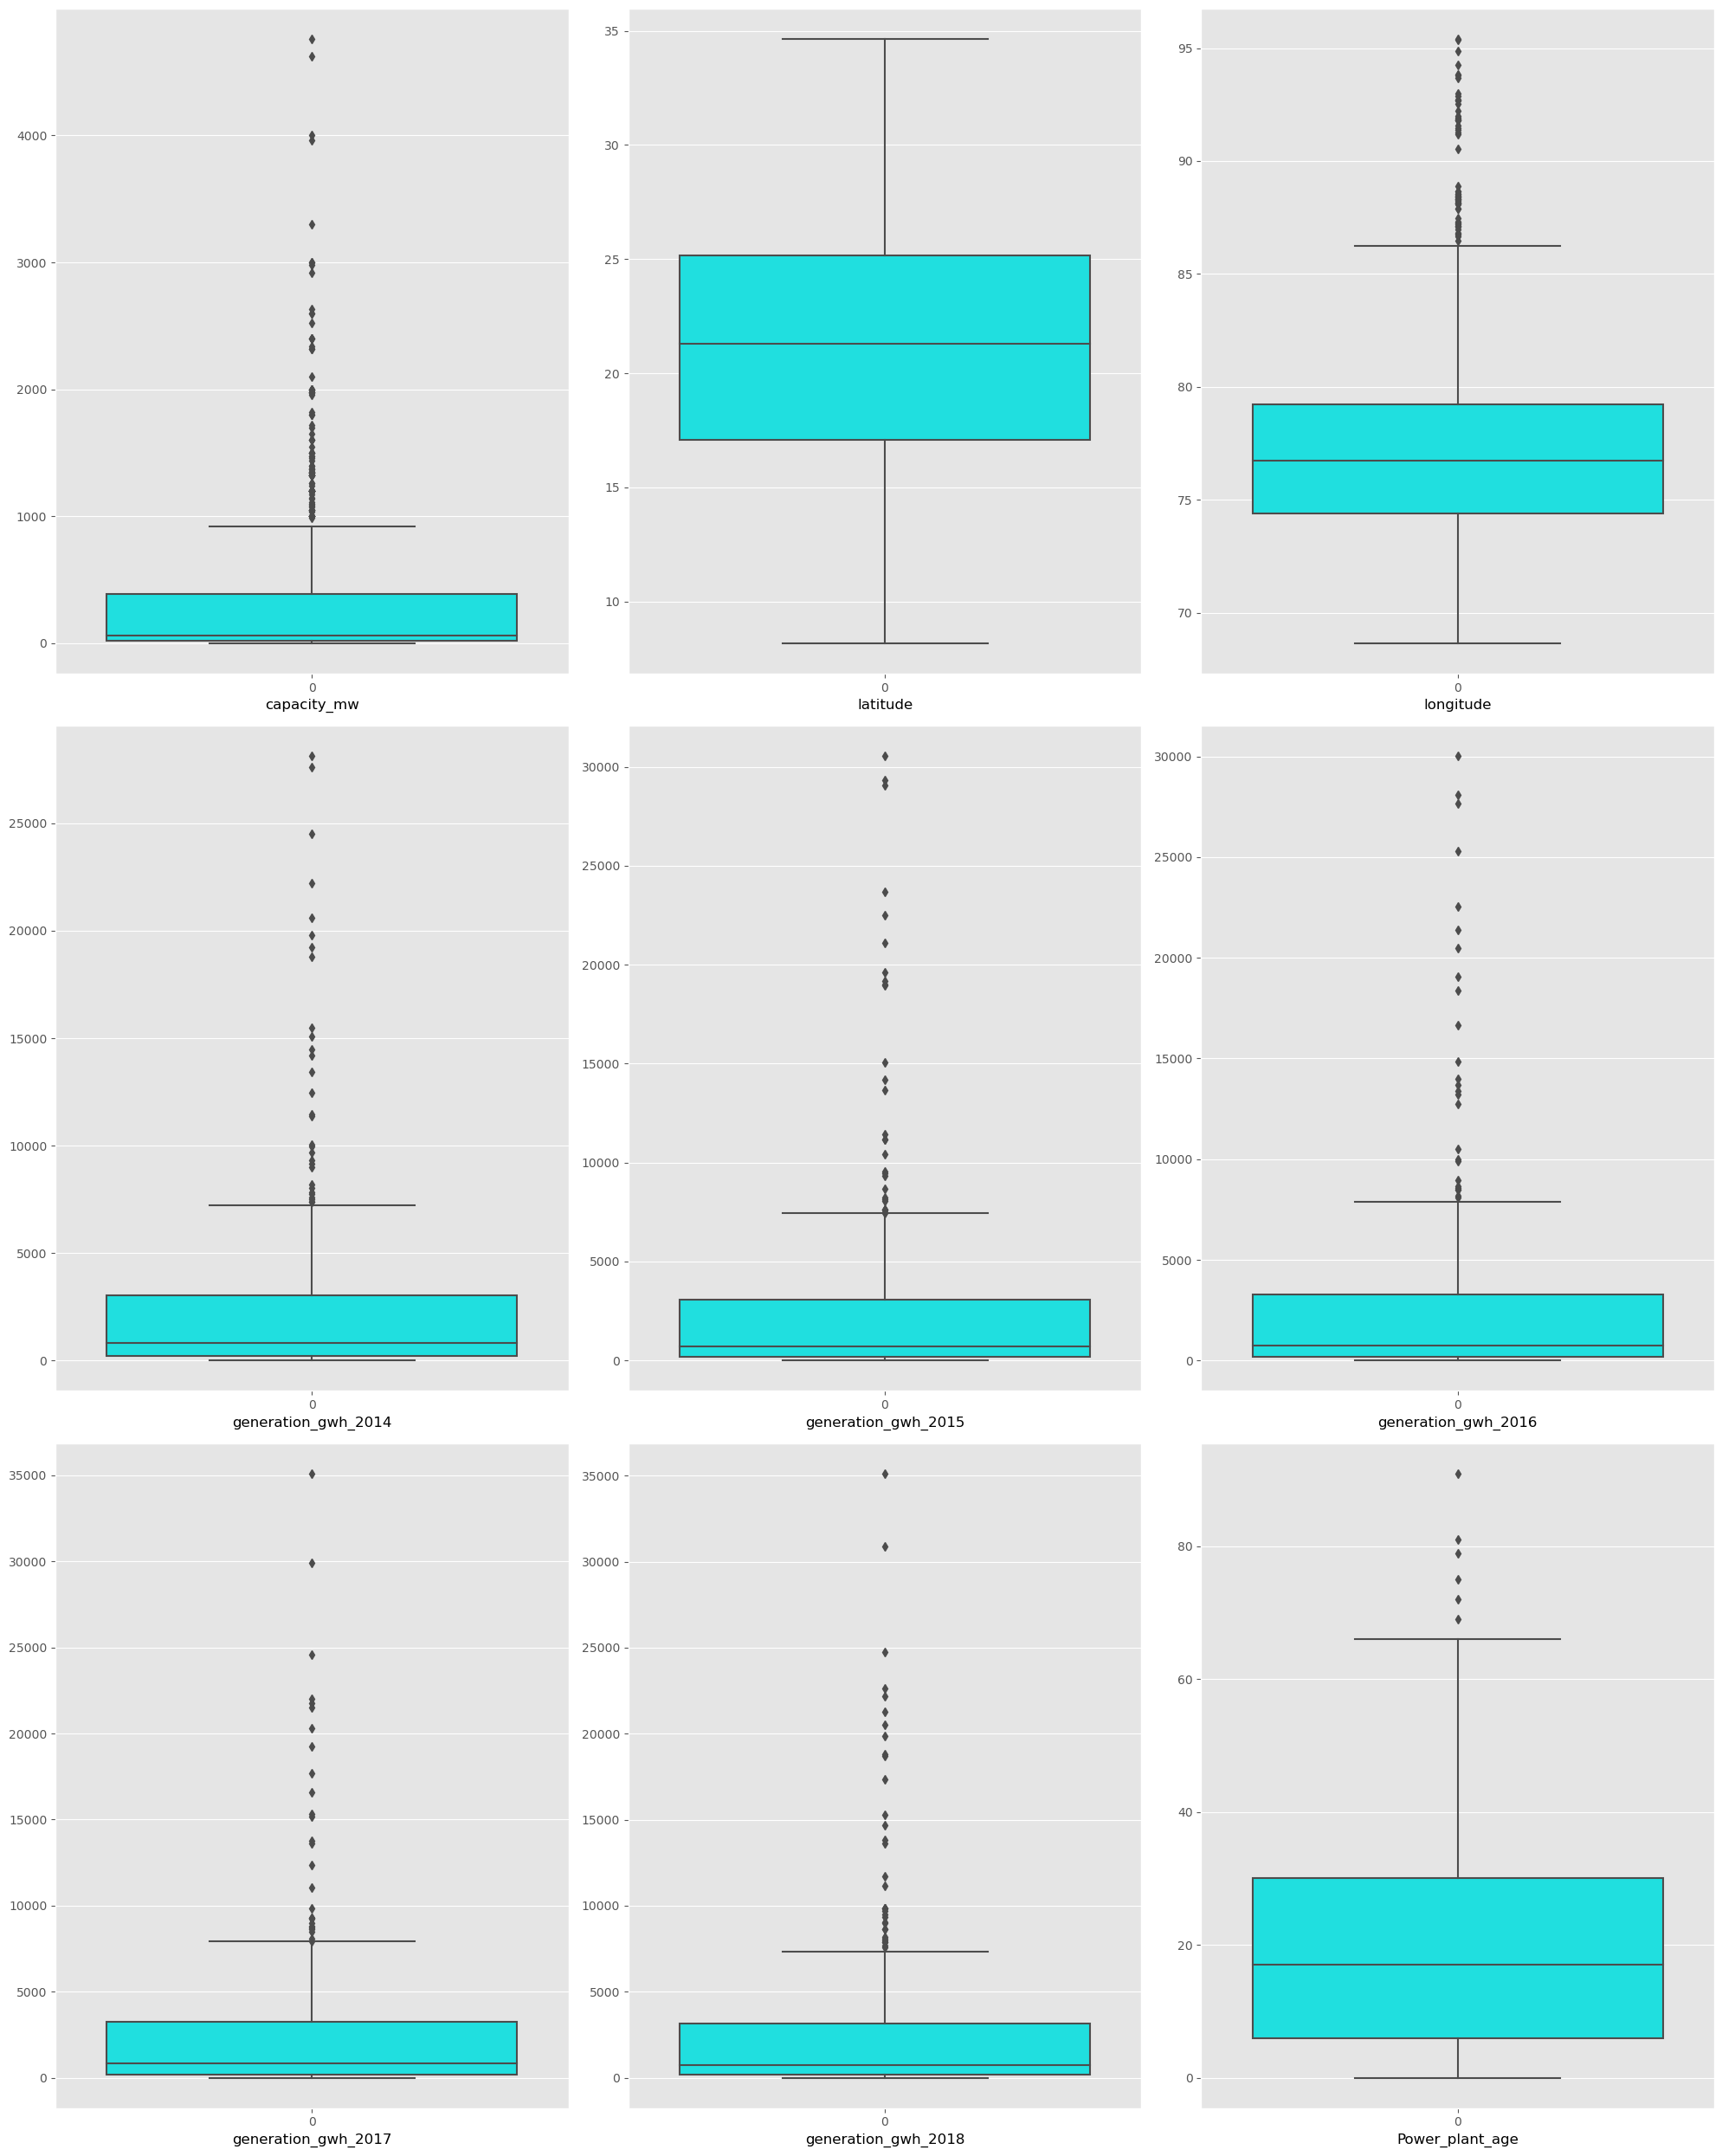

In [46]:
plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

<font size='4'>**Observations :-**
    
- There outliers exist in data.

- There are no outliers in lower capping level.

- So, We will use Quantile-based Flooring and Capping technique.

In [47]:
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [48]:
df2=df.copy

In [49]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [50]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


**Data Loss**

In [51]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


<font size='4'>**Correlation Matrix**

In [52]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050984,0.199299,-0.380395,-0.606289,0.839094,0.844352,0.870620,0.886673,0.901918,-0.304087
latitude,0.050984,1.000000,0.036341,-0.010204,-0.032790,0.060677,0.049134,0.041905,0.041711,0.041414,-0.124504
longitude,0.199299,0.036341,1.000000,-0.352056,-0.277617,0.017769,0.027840,0.055967,0.055623,0.052362,-0.114137
primary_fuel,-0.380395,-0.010204,-0.352056,1.000000,0.476410,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,0.336501
other_fuel1,-0.606289,-0.032790,-0.277617,0.476410,1.000000,-0.420870,-0.403869,-0.419541,-0.435230,-0.429803,0.359209
generation_gwh_2014,0.839094,0.060677,0.017769,-0.405019,-0.420870,1.000000,0.961098,0.937060,0.912561,0.902781,-0.160014
generation_gwh_2015,0.844352,0.049134,0.027840,-0.393335,-0.403869,0.961098,1.000000,0.974918,0.940191,0.934371,-0.170363
generation_gwh_2016,0.870620,0.041905,0.055967,-0.408951,-0.419541,0.937060,0.974918,1.000000,0.972024,0.962073,-0.193743
generation_gwh_2017,0.886673,0.041711,0.055623,-0.421736,-0.435230,0.912561,0.940191,0.972024,1.000000,0.985856,-0.191367
generation_gwh_2018,0.901918,0.041414,0.052362,-0.421518,-0.429803,0.902781,0.934371,0.962073,0.985856,1.000000,-0.193694


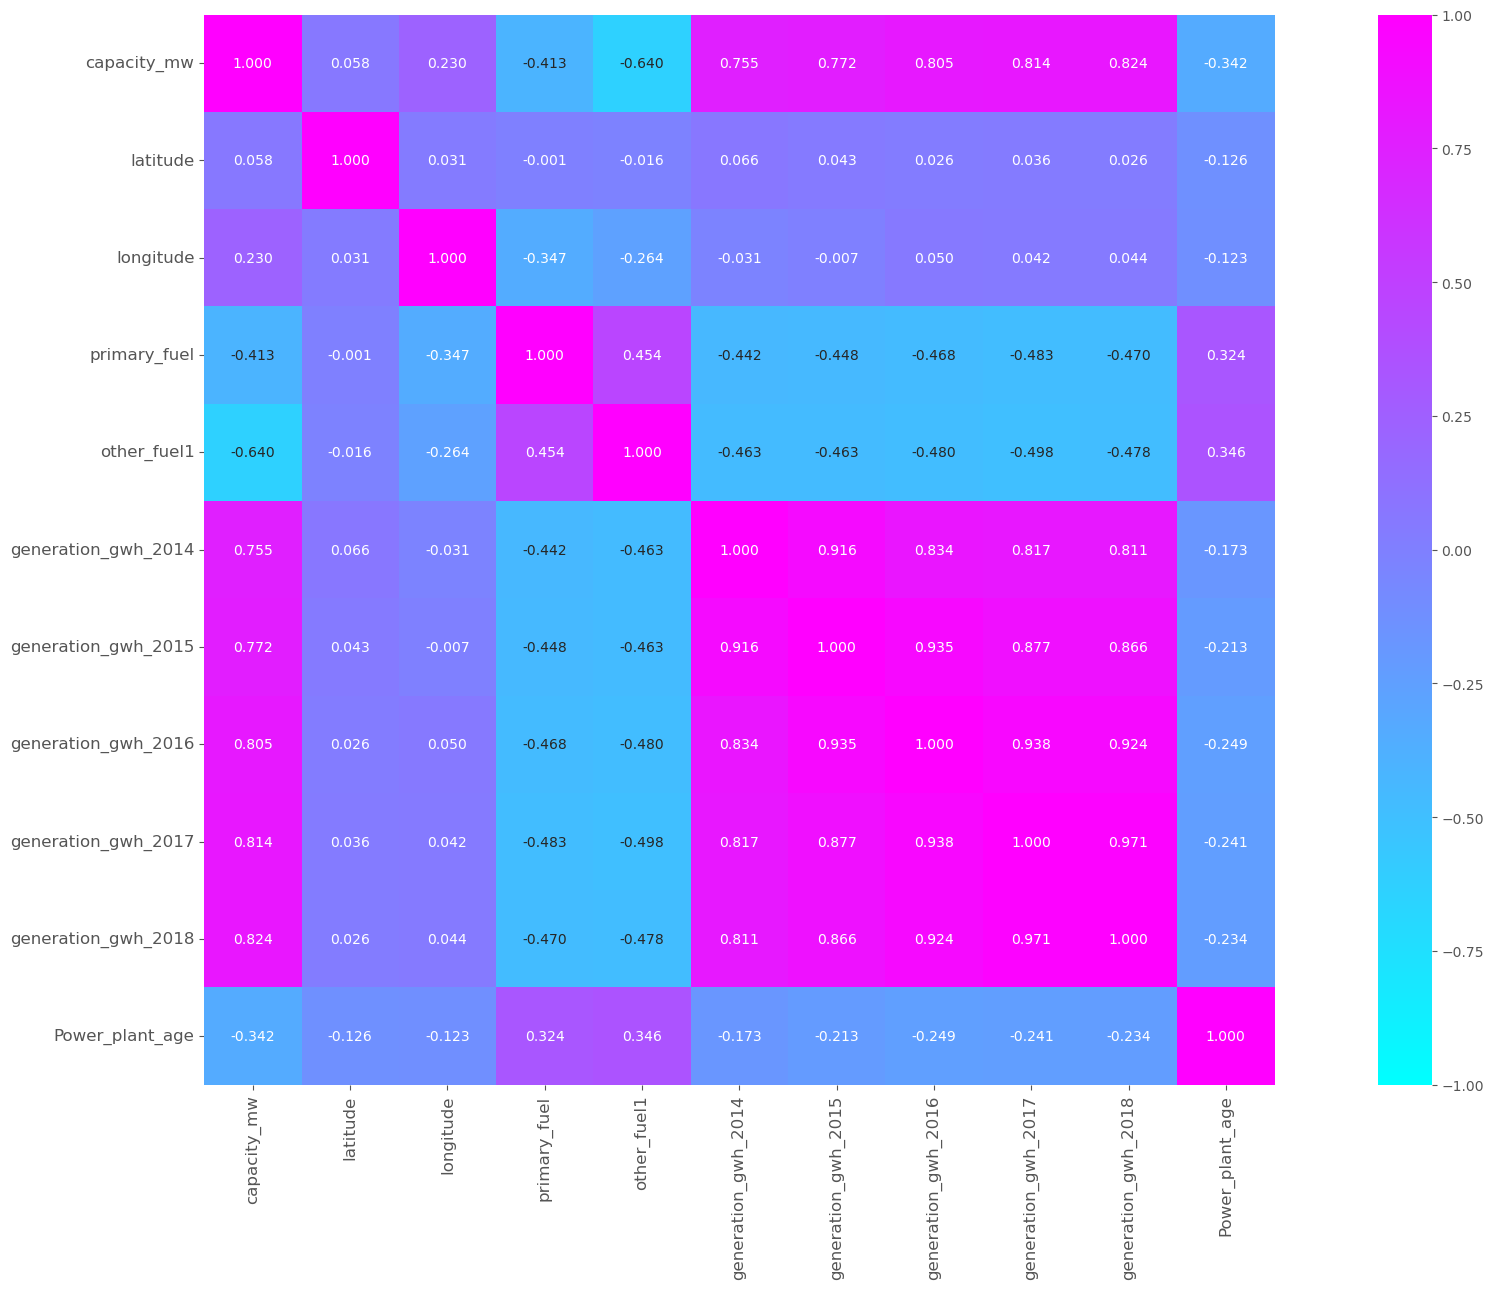

In [53]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<font size='4'>**Observations :-**
    
- The label capacity_mw is highly positively correlated with the features                                                         generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014.

- Capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

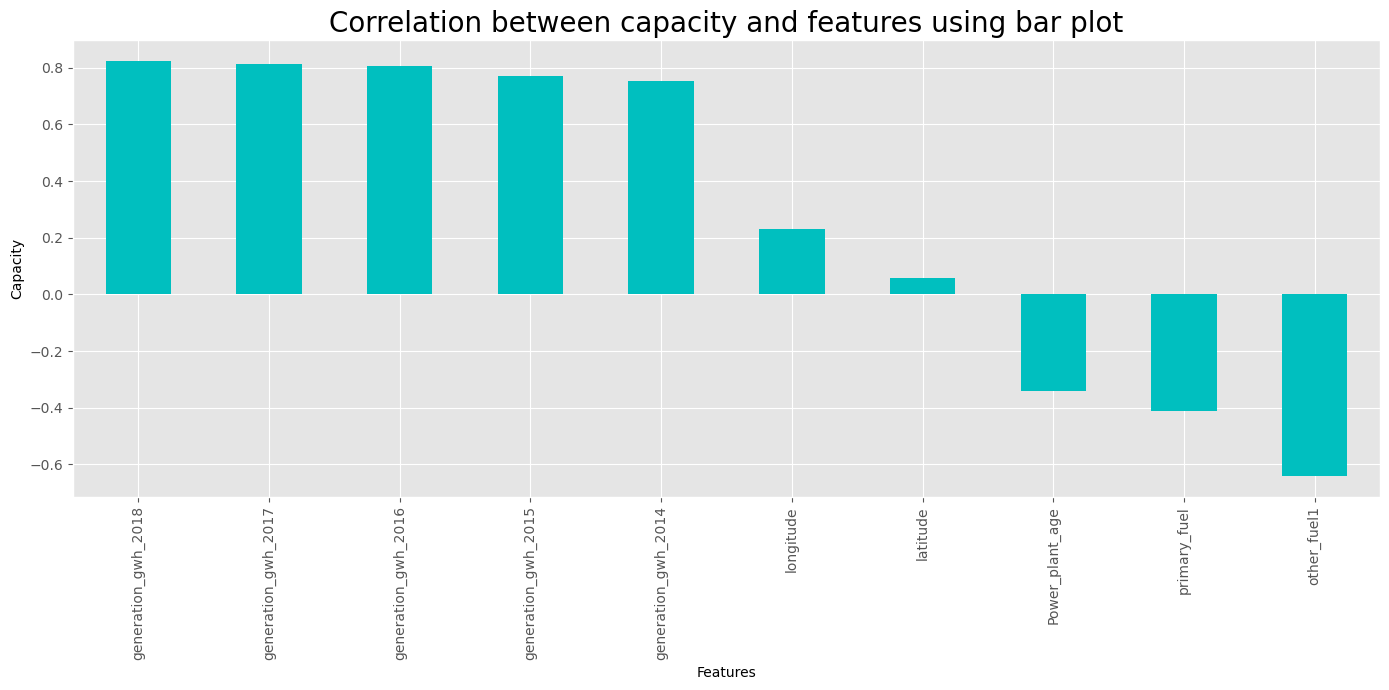

In [54]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

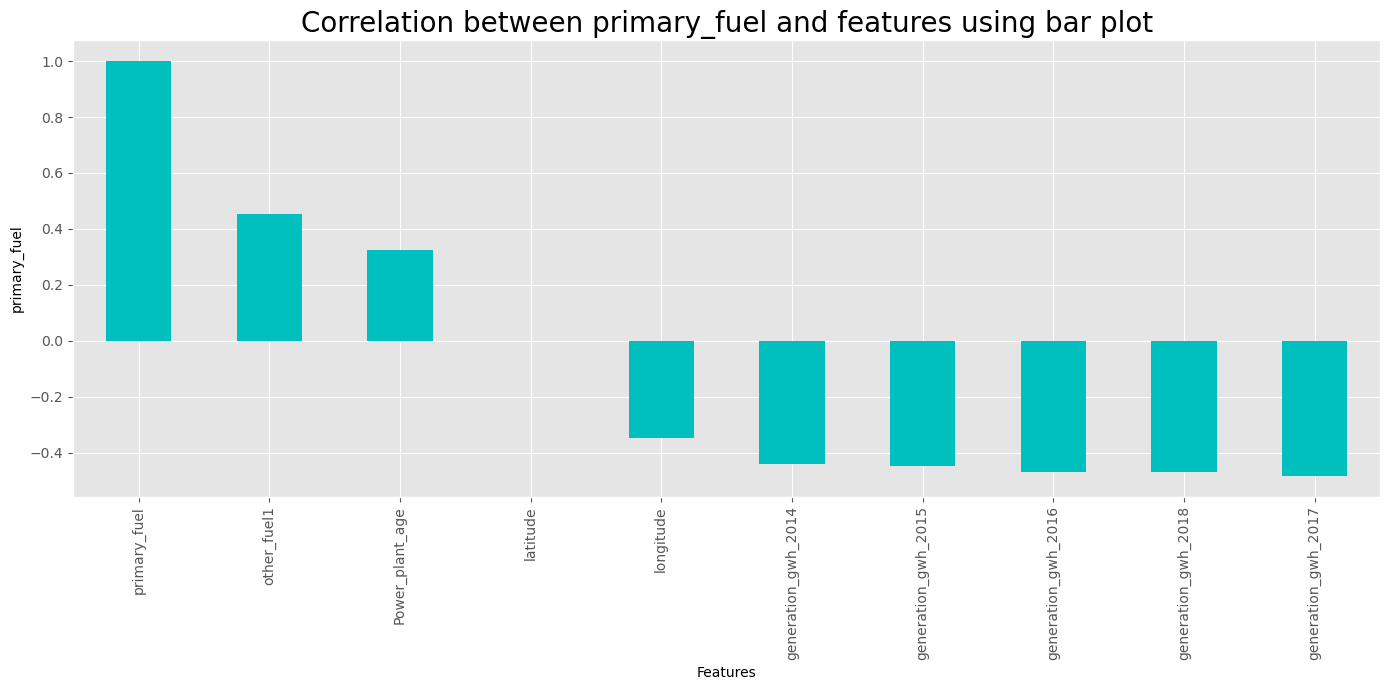

In [55]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

<font size='5'>**SKEWNESS**

In [56]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [57]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [58]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [59]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [60]:
data.drop("other_fuel1",axis=1,inplace=True)

In [61]:
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

<FONT SIZE='4'>**Removal of Missing Data**

In [62]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

# Machine Learning Model

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

<FONT SIZE='4'>**Standard Scaling**

In [64]:
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


<FONT SIZE='4'>**Serach Best Random State**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


<font size='4'>**Logistics Regression**

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=517, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6098484848484849


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  0  0  0  0 11]
 [ 0 47  0 14  0  0  2  3]
 [ 0  6  0  7  0  0  0  1]
 [ 0 12  0 64  0  0  0  6]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  2  0  0  0  3]
 [ 0  0  0 12  0  0 24 12]
 [ 0  1  0  5  0  0  3 26]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.70      0.71      0.71        66
           2       0.00      0.00      0.00        14
           3       0.60      0.78      0.68        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.83      0.50      0.62        48
           7       0.42      0.74      0.54        35

    accuracy                           0.61       264
   macro avg       0.32      0.34      0.32       

<font size='4'>**Decision Tree-Classifier**

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6818181818181818


Confusion matrix of DecisionTreeClassifier : 
 [[ 6  2  0  0  0  0  1  3]
 [ 0 45  6 11  0  3  3  1]
 [ 0  3  4  8  0  2  0  1]
 [ 0  6  5 60  0  0  1  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 1  3  0  1  0  0 33  2]
 [ 4  0  0  0  0  0 10 30]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.73      0.65      0.69        69
           2       0.24      0.22      0.23        18
           3       0.73      0.83      0.78        72
           4       0.00      0.00      0.00         4
           5       0.29      0.40      0.33         5
           6       0.69      0.82      0.75        40
           7       0.81      0.68      0.74        44

    accuracy                           0.68       264
   macro avg       0.50      0.51      0.5

<font size='4'>**Random Forest Classifier**

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.75


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 2 52  4  7  0  2  0  2]
 [ 0  4  7  6  0  0  0  1]
 [ 0  7  2 63  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  3  0  0  0  0 33  4]
 [ 2  1  0  0  0  0  8 33]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.70      0.75      0.73        69
           2       0.54      0.39      0.45        18
           3       0.80      0.88      0.83        72
           4       0.00      0.00      0.00         4
           5       0.50      0.40      0.44         5
           6       0.79      0.82      0.80        40
           7       0.82      0.75      0.79        44

    accuracy                           0.75       264
   macro avg       0.60      0.58      0.59       264
we

<font size='4'>**ExtraTreesClassifier()**

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7575757575757576


Confusion matrix of ExtraTreesClassifier : 
 [[ 9  2  0  0  0  0  1  0]
 [ 0 54  5  7  1  1  0  1]
 [ 0  5 10  3  0  0  0  0]
 [ 0  8  2 61  0  0  0  1]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 6  3  0  0  0  0 31  0]
 [ 1  3  0  0  0  0  7 33]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.69      0.78      0.73        69
           2       0.59      0.56      0.57        18
           3       0.81      0.85      0.83        72
           4       0.00      0.00      0.00         4
           5       0.67      0.40      0.50         5
           6       0.79      0.78      0.78        40
           7       0.94      0.75      0.84        44

    accuracy                           0.76       264
   macro avg       0.63      0.61      0.61       

<font size='5'>**Cross Validation**

In [72]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('**************************************************************************************************************')



Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873


**************************************************************************************************************


Cross Validation Score DecisionTreeClassifier() :

Score : [0.71022727 0.67045455 0.72571429 0.73714286 0.64571429]
Mean Score : 0.6978506493506493
Std deviation : 0.034473722029125416


**************************************************************************************************************


Cross Validation Score RandomForestClassifier() :

Score : [0.74431818 0.76136364 0.80571429 0.76       0.76571429]
Mean Score : 0.767422077922078
Std deviation : 0.020468471861888916


**************************************************************************************************************


Cross Validation Score ExtraTreesClassifier() :

Score : [0.76136364 0.77840909 0.80571429 0.77142857 0

**We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.**

# Hyper Parameter Tuning : GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,n_jobs = -1 )
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [76]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 25}

# Final Classification Model

In [77]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators=25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7159090909090909


In [78]:
from sklearn.metrics import roc_auc_score
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.865820 (macro),
0.891407 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.878383 (macro),
0.937118 (weighted by prevalence)


<font size='4'>**Confusion Matrix**

In [79]:
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)

[[ 7  3  0  0  0  0  1  1]
 [ 2 52  4  8  0  0  0  3]
 [ 0  5  5  5  0  2  0  1]
 [ 0  3  4 64  0  1  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  3  0  0  0  0 33  4]
 [ 2  8  0  0  0  0  7 27]]


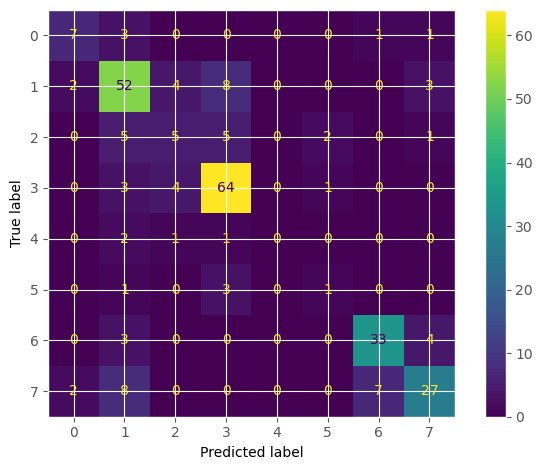

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

<font size='4'>**Save the Model**

In [81]:
import joblib
joblib.dump(Final_mod,'Powerplant_Classification_Final.pkl')

['Powerplant_Classification_Final.pkl']

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

<font size='4'>**Feature Engineering before Proceeding**

In [83]:
df2=df.copy()

In [84]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [85]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [86]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,-0.115824,0.109529,0.134579,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,0.916782,1.451544,1.495059,1.596280,-1.370997


In [87]:
data.drop("other_fuel1",axis=1,inplace=True)

data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [88]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

<font size='4'>**Standard Scalling**

In [89]:
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [90]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (587, 4)
Training target vector size: (587,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.32142351199370456 on Random_state 66


<font size='4'>**Linear Regression**

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=66, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 6.14303533e+01  1.60473128e+02  6.09119063e+01  2.85549285e+02
  2.69028213e+01  4.29873498e+02  4.22875382e+02  1.33589826e+02
  5.41119232e+02 -3.81765853e-01 -6.46904240e+00  8.45440465e+01
  5.78437191e+01  4.20805423e+02  2.75253487e+02  1.03111502e+02
  5.36885601e+01  1.77141371e+02  1.10971515e+02  1.84288632e+01
 -2.14489561e+00 -4.81220512e+00  3.71582628e+02  7.17432421e+01
  6.84570175e+02 -3.15886361e+01 -1.38324360e+01 -1.51622061e+00
  3.41551984e+02  4.08735284e+02 -3.37872042e+01  7.52282377e+01
  9.61205007e+00  6.76880047e+01  1.02555464e+02  5.63192964e+02
  5.96291625e+01  3.59498268e+02  6.82104322e+02 -1.37021398e+00
  2.43003375e+00  2.47279397e+02  4.60303262e+02 -8.56077856e+00
  8.90450510e+01  3.91446415e+02  3.14811138e+01  4.91860629e+02
  2.73395247e+02  3.98874662e+01  1.33658810e+02 -6.22664829e+01
  3.94146911e+02  5.61736869e+02  1.04998492e+02  3.39086715e+02
  1.28426474e+02 -1.80138583e+01 -1.52357475e-02  2.26613499e+02
 -1.7435

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 218.76141412083945
Mean squared error : 102525.29738165268
Root Mean Squared Error: 320.195717306857


 R2 Score :
0.3061654032023382


<font size='4'>**Apply other ML Models**

In [95]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('******************************************************************************************************************')



 Error of  RandomForestRegressor() :
Mean absolute error : 150.61093886213237
Mean squared error : 60645.82724348943
Root Mean Squared Error: 246.26373513672172


 R2 Score :
0.5895825306771828
******************************************************************************************************************


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 218.76108437931967
Mean squared error : 102525.40762059328
Root Mean Squared Error: 320.19588944986987


 R2 Score :
0.30616465716606356
******************************************************************************************************************


 Error of  DecisionTreeRegressor() :
Mean absolute error : 193.9075909090909
Mean squared error : 120885.40906216775
Root Mean Squared Error: 347.6857907107619


 R2 Score :
0.18191430605516823
******************************************************************************************************************


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error

In [96]:
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('***************************************************************************************************************')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.5068929863343208
***************************************************************************************************************


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.22748377028159936
***************************************************************************************************************


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.21201573455009531
***************************************************************************************************************


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.46753442347003027
***************************************************************************************************************


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.48805352296082705
********************************************************************************************

**Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.**

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['squared_error', 'poisson', 'absolute_error'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [99]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv = 5,n_jobs = -1)

In [100]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson',
                                       'absolute_error'],
                         'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]})

In [101]:
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

<font size='5'>**Final Regression Model**

In [102]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'poisson', max_depth= 40, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 150.3959238199063
Mean squared error : 57506.27536065522
Root Mean Squared Error: 239.80466084014134


 R2 Score of Final Model :
0.6108292841164119




 True Values Vs Predicted Value plot :


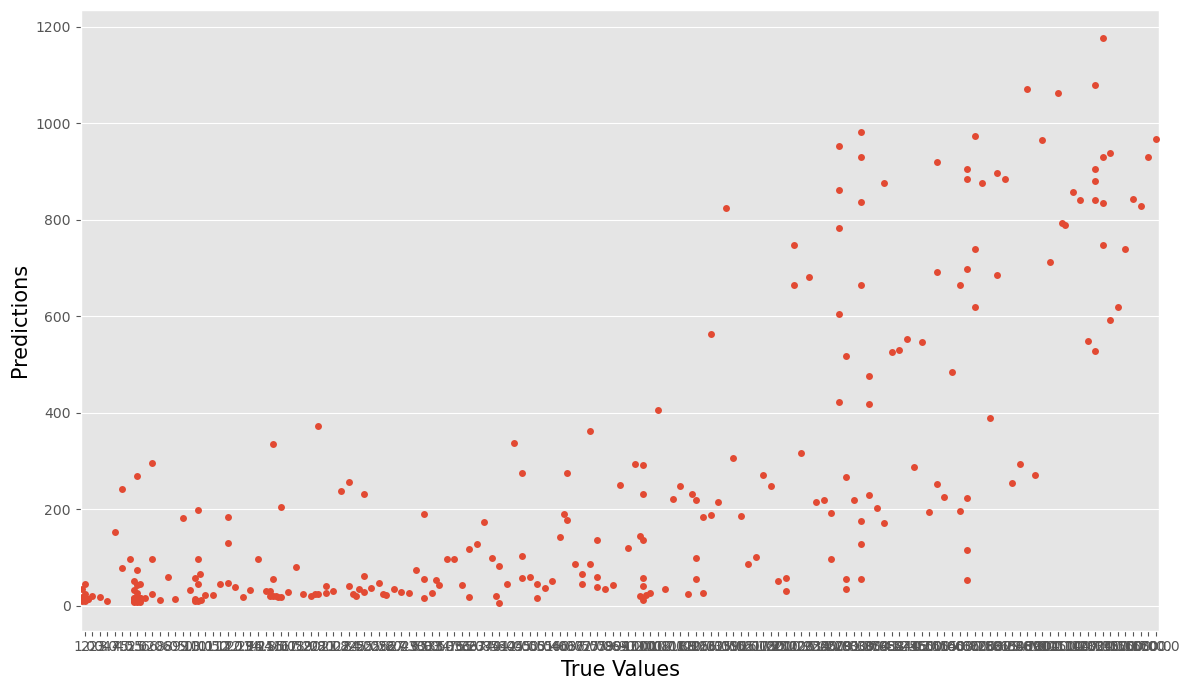

In [103]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test, y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

<font size='5'>**Save the Final Regression Model**

In [104]:
import joblib
joblib.dump(Final_mod,'Powerplant_Regression_Final.pkl')

['Powerplant_Regression_Final.pkl']

<font size='4'>**Predict Capacity_MW Data**

In [105]:
capacity_data = joblib.load("Powerplant_Regression_Final.pkl")

In [106]:
prediction = capacity_data.predict(X_test)

In [107]:
original = np.array(Y_test)
df = pd.DataFrame()
df["Original capacity_mw"] = original
df["Predicted capacity_mw"] = prediction
df

,Original capacity_mw,Predicted capacity_mw
0,5.0,15.910810
1,815.6,254.794364
2,10.0,10.054044
3,250.0,422.754747
4,5.0,16.113873
...,...,...
259,100.8,27.745042
260,600.0,905.227426
261,135.0,823.992354
262,50.4,37.207575


<font size='4'>**Predict Primary Fuel Data**

In [108]:
Primary_data = joblib.load("Powerplant_Classification_Final.pkl")

In [109]:
prediction = Primary_data.predict(X_test)

In [110]:
prediction

array([1, 3, 6, 3, 6, 1, 6, 3, 3, 1, 1, 1, 6, 1, 7, 1, 1, 1, 1, 6, 6, 1,
       1, 3, 1, 6, 6, 6, 3, 2, 6, 3, 6, 6, 1, 3, 3, 2, 3, 6, 6, 3, 1, 6,
       3, 3, 1, 6, 3, 3, 1, 6, 1, 3, 1, 3, 3, 6, 6, 3, 6, 1, 5, 3, 3, 1,
       6, 3, 3, 1, 3, 3, 6, 1, 5, 3, 1, 3, 1, 1, 5, 3, 1, 6, 1, 5, 2, 3,
       3, 6, 6, 1, 1, 3, 6, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 2, 1, 1, 5,
       3, 2, 1, 6, 3, 1, 6, 3, 2, 6, 1, 6, 1, 1, 2, 6, 3, 3, 3, 2, 0, 6,
       2, 3, 6, 1, 6, 1, 1, 6, 1, 6, 3, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1, 1,
       6, 2, 1, 3, 6, 3, 3, 5, 6, 6, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 3, 3,
       1, 6, 1, 1, 2, 3, 1, 5, 1, 6, 1, 2, 1, 1, 3, 1, 2, 1, 6, 1, 3, 1,
       6, 2, 6, 2, 1, 2, 3, 6, 1, 1, 6, 1, 3, 6, 2, 2, 6, 6, 3, 2, 3, 3,
       3, 7, 1, 3, 2, 6, 3, 6, 6, 1, 6, 1, 6, 3, 1, 2, 1, 2, 6, 1, 6, 6,
       6, 3, 6, 3, 1, 6, 2, 3, 6, 2, 3, 2, 2, 6, 1, 3, 6, 6, 6, 3, 6, 3])

In [112]:
df = pd.DataFrame()
df["Predicted Primary Fuel"] = prediction
df

,Predicted Primary Fuel
0,1
1,3
2,6
3,3
4,6
...,...
259,6
260,6
261,3
262,6
